# Dimensionality reduction

## Setup
### Imports

In [5]:
import pandas as pd                                     # for dataset manipulation (DataFrames)
import numpy as np                                      # allows some mathematical operations
import matplotlib.pyplot as plt                         # library used to display graphs
import seaborn as sns                                   # more convenient visualisation library for dataframes
from sklearn.model_selection import train_test_split    # for classification
from sklearn.neighbors import KNeighborsClassifier      # for classification
from sklearn.decomposition import PCA                   # for Principal Component Analysis
import time                                             # for execution time measurement

### Loading the dataset

In [6]:
fives = np.loadtxt("fives.txt", delimiter=",")
sixes = np.loadtxt("sixes.txt", delimiter=",")

# for practical reasons, we convert these arrays to a pandas dataframe
df_fives = pd.DataFrame(fives)
df_sixes = pd.DataFrame(sixes)

# we also create a dataframe containing all numbers for later classification
df_fives["number"] = 5 # data labeling
df_sixes["number"] = 6 # data labeling
df = pd.concat([df_fives, df_sixes], ignore_index=True)
df_fives.drop("number", inplace=True,axis=1)
df_sixes.drop("number", inplace=True,axis=1)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,number
0,-1.0,-1.0,-1.000,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,5
1,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.912,...,-0.257,0.480,0.966,0.408,-0.895,-1.000,-1.000,-1.000,-1.0,5
2,-1.0,-1.0,-1.000,-0.449,1.000,1.000,1.000,1.000,1.000,0.840,...,0.626,1.000,0.830,0.494,-0.343,-1.000,-1.000,-1.000,-1.0,5
3,-1.0,-1.0,-1.000,-1.000,-0.989,-0.185,0.626,1.000,0.672,0.372,...,0.765,0.372,-0.163,-0.968,-1.000,-1.000,-1.000,-1.000,-1.0,5
4,-1.0,-1.0,-0.999,-0.699,-0.684,-0.909,-1.000,-0.764,-0.684,-0.303,...,0.438,0.903,0.762,0.140,-0.716,-1.000,-1.000,-1.000,-1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.290,0.972,...,0.573,0.529,0.133,-0.652,-1.000,-1.000,-1.000,-1.000,-1.0,6
1216,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-0.599,0.309,1.000,...,0.897,1.000,1.000,0.940,0.233,-0.474,-0.941,-1.000,-1.0,6
1217,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.981,-0.572,0.687,0.592,...,0.269,-0.505,-0.962,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,6
1218,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.921,-0.249,0.460,0.826,...,0.138,0.996,0.676,-0.381,-1.000,-1.000,-1.000,-1.000,-1.0,6


### Utility functions

In [9]:
def show_image(row, title=""):
    """This function takes a row of 256 pixels and displays it as a greyscale image"""
    image = np.reshape(row, (16, 16))
    plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.show()


def split_data(data):
    X = data.drop("number", axis=1)
    y = data.number
    return train_test_split(X, y,
                            test_size=0.33,  # 33% of the data will be used for testing
                            random_state=42,  # ensures reproducibility of the test
                            stratify=y  # the proportion of each class remains the same in the train and test set
                            )


def print_knn_score(scores, data_type=""):
    max_score = max(scores)
    k_values_max_score = [i + 1 for i, v in enumerate(scores) if v == max_score]
    print(f'Max {data_type} score {max_score * 100} % for k = {[i for i in k_values_max_score]}')


def prediction_knn(data):
    """ KNN-based classification. """
    X_train, X_test, y_train, y_test = split_data(data)
    test_scores = []
    train_scores = []

    for k in range(1, 15):
        knn = KNeighborsClassifier(k)
        knn.fit(X_train, y_train)
        train_scores.append(knn.score(X_train, y_train))  # "score" for KNN is the accuracy of the classification
        test_scores.append(knn.score(X_test, y_test))

    print_knn_score(train_scores, "train")
    print_knn_score(test_scores, "test")


def run_measure_time(function, **kwargs):
    start_time = time.time()
    function(**kwargs)
    print("--- %s seconds ---" % (time.time() - start_time))

### Baseline test

In [10]:
# equivalent to prediction_knn(data=df), but also measures time using our utility function
run_measure_time(prediction_knn, data=df)

Max train score 100.0 % for k = [1]
Max test score 98.51116625310173 % for k = [1]
--- 1.1366722583770752 seconds ---


### Observing the dataset

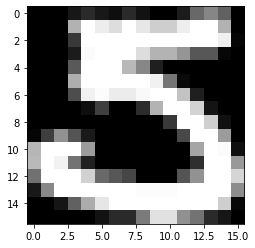

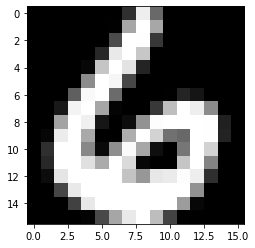

In [11]:
index = 0 # index of the image to show
show_image(fives[index, :])
show_image(sixes[index, :])
# to do the same from a pandas dataframe
# show_image(df_fives.iloc[0].to_numpy())

Using what you have learned in the previous lessons, examine the dataset and see what you can learn about it.

In [ ]:
# Your code here

*[Your comments here]*

## Principal Component Analysis (PCA)
### Pre-processing

When using PCA, it is necessary to standardize the data. Pixel values are already between -1 and 1, so we only need to center the data.
Using what you have learned last time, center the data in `df_fives` and `df_sixes` respectively.

*Hint: You can refer to the data preparation practical and use `sklearn`'s `StandardScaler`*.

⚠️Centering means removing the mean value. You do not need to divide by the standard deviation. `sklearn`'s `StandardScaler` lets you do that, check its documentation to see how.
⚠️Store the standardized data in new variables, because we will need the original data later.

In fact, this step is not strictly necessary here, because we will use `sklearn`'s implementation of PCA, which already includes standardization. However, it is important to keep in mind the importance of this step (and to know how to do it yourself).

In [20]:
# Your code here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_std=False)
number = df["number"].to_numpy() # create an instance of the scaler  
df_std = df.drop(["number"], inplace=False,axis=1)
df_std = scaler.fit_transform(df_std)
df_std = pd.DataFrame(df_std, columns=df.columns[:-1])
df_std["number"]=number

In [23]:
# Your code here
from sklearn.preprocessing import StandardScaler

df5_std = df_std[df_std["number"]==5]
df6_std = df_std[df_std["number"]==6]
df5_std

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,number
0,-0.000247,-0.002234,-0.012911,0.156338,0.271335,0.082549,-0.09269,-0.117386,-0.61877,-0.870983,...,-1.042041,-0.292575,0.805836,1.181328,0.826129,0.787098,0.291642,0.163645,-0.000783,5
1,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.446386,-0.76577,-0.782983,...,-0.628041,0.220425,1.010836,0.827328,-0.194871,-0.117902,-0.037358,-0.008355,-0.000783,5
2,-0.000247,-0.002234,-0.012911,0.520338,1.942335,1.891549,1.79431,1.553614,1.23423,0.969017,...,0.254959,0.740425,0.874836,0.913328,0.357129,-0.117902,-0.037358,-0.008355,-0.000783,5
3,-0.000247,-0.002234,-0.012911,-0.030662,-0.046665,0.706549,1.42031,1.553614,0.90623,0.501017,...,0.393959,0.112425,-0.118164,-0.548672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,5
4,-0.000247,-0.002234,-0.011911,0.270338,0.258335,-0.017451,-0.20569,-0.210386,-0.44977,-0.173983,...,0.066959,0.643425,0.806836,0.559328,-0.015871,-0.117902,-0.037358,-0.008355,-0.000783,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.446386,-0.76577,-0.870983,...,0.013959,0.492425,0.593836,0.968328,1.089129,0.736098,0.110642,-0.008355,-0.000783,5
552,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.146386,-0.08077,-0.013983,...,0.189959,-0.044575,-0.466164,-0.580672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,5
553,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.446386,-0.76577,-0.870983,...,-1.371041,-1.259575,-0.955164,-0.580672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,5
554,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.446386,-0.76577,-0.870983,...,-1.371041,-1.259575,-0.955164,-0.580672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,5


In [24]:
df6_std

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,number
556,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.077386,1.09623,-0.037983,...,0.451959,0.740425,0.526836,-0.054672,-0.290871,-0.117902,-0.037358,-0.008355,-0.000783,6
557,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,0.494549,1.77731,0.018614,-0.76577,-0.870983,...,-0.356041,-1.121575,-0.826164,-0.017672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,6
558,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.446386,-0.03577,1.102017,...,0.256959,0.313425,-0.139164,-0.471672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,6
559,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.147386,0.94223,-0.592983,...,0.511959,-0.508575,-0.955164,-0.580672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,6
560,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.446386,0.25723,0.911017,...,0.238959,0.740425,0.516836,-0.444672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.446386,-0.05577,1.101017,...,0.201959,0.269425,0.177836,-0.232672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,6
1216,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.20569,-0.045386,0.54323,1.129017,...,0.525959,0.740425,1.044836,1.359328,0.933129,0.408098,0.021642,-0.008355,-0.000783,6
1217,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.18669,-0.018386,0.92123,0.721017,...,-0.102041,-0.764575,-0.917164,-0.580672,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,6
1218,-0.000247,-0.002234,-0.012911,-0.030662,-0.057665,-0.108451,-0.12669,0.304614,0.69423,0.955017,...,-0.233041,0.736425,0.720836,0.038328,-0.299871,-0.117902,-0.037358,-0.008355,-0.000783,6


### Understanding what PCA does
In this part, we will try to visualize what PCA does. For this, we will start with an "average" image, and progressively add PCA components. For this visualization step, we will only be using the dataframe containing the handwritten fives.

#### Step 1: Compute the "average 5"
Create a vector (pandas Series, for example) that contains the "mean 5".
Display this vector as an image. How do you interpret this ?

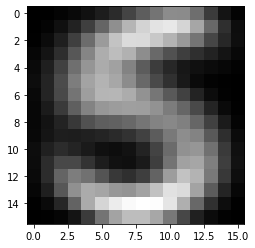

In [47]:
mean_5 = df_fives.mean()
show_image(mean_5.to_numpy())

In [ ]:
import matplotlib.pyplot as plt

# Créer un vecteur avec la moyenne 5 répétée 20 fois
mean_value = df_fives.mean
vector_length = 20

#### Step 2: Obtain the components from PCA
Read the code cell below. Using the documentation, explain what is done at each step.

In [51]:
pca = PCA()                              # Crée une instance de la classe PCA (Analyse en Composantes Principales)
# PCA (Principal Component Analysis) est une technique de réduction de dimensionnalité qui permet de transformer les données en un nouvel espace de dimensions réduites, en conservant les caractéristiques importantes de ces données.
pca.fit(df_fives)                        #Ajuste le modèle PCA aux données contenues dans df_fives
# Cette ligne entraîne le modèle PCA sur les données fournies (df_fives), en calculant les composantes principales et d'autres propriétés du modèle.
components5 = pca.components_            # Récupère les composantes principales du modèle PCA
# Les composantes principales sont les vecteurs propres qui définissent les directions dans lesquelles les données ont la plus grande variabilité.
projection5 = pca.transform(df_fives)     # Projette les données dans le nouvel espace PCA
# Cette ligne projette les données originales (df_fives) dans le nouvel espace défini par les composantes principales, ce qui réduit la dimensionnalité des données tout en conservant leur structure relative.

#### Step 3: Reconstruct an image progressively
In this part, we will reconstruct an image from its PCA components.

**Questions**:
- Understand and explain the line marked with a question mark ❓.
- Observe the resulting images. How many components are necessary to obtain a "nice" image? How do you interpret this?
- By modifying the code below, display a reconstruction with 10 components. What do you observe?
- By modifying the code below, try displaying other instances of the number five from the dataset.

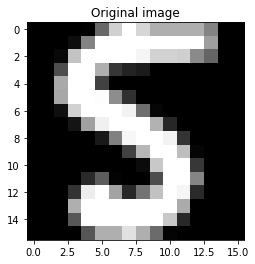

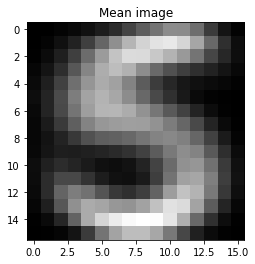

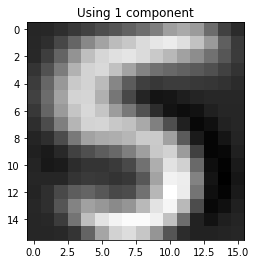

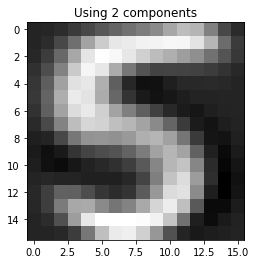

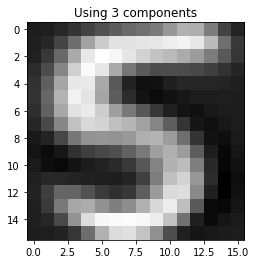

In [50]:
image_index = 3
original_image = df_fives.iloc[image_index].to_numpy()
show_image(original_image, "Original image")      # we first display the original image

reconstructed_image = df_fives.mean().to_numpy()
show_image(reconstructed_image, "Mean image") # then we display the mean image

for i in range(0,3): # and finally we reconstruct the image using the components
    reconstructed_image = reconstructed_image + projection5[image_index,i] * components5[i] # ❓
    show_image(reconstructed_image, f"Using {i+1} component{'s' if i>0 else ''}")

#### Bonus step: Doing the same with the number 6
Now that you understand how to use `scikit-learn`'s PCA, make the same observations with the database of number 6's.

In [66]:
pca = PCA() 
pca.fit(df_fives)
components6 = pca.components_
projection6 = pca.transform(df_sixes)

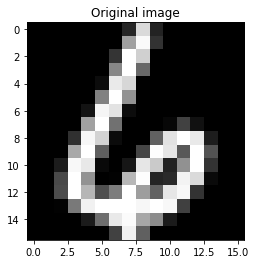

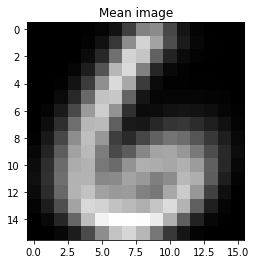

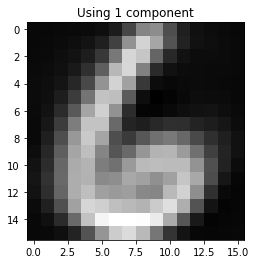

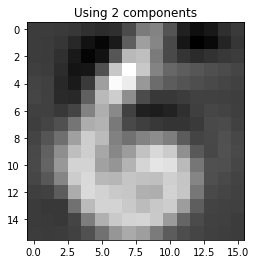

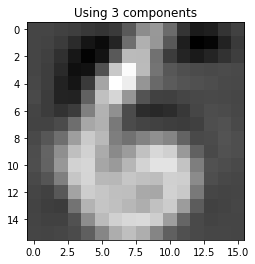

In [57]:
image_index = 3
original_image = df_sixes.iloc[image_index].to_numpy()
show_image(original_image, "Original image")      # we first display the original image

reconstructed_image = df_sixes.mean().to_numpy()
show_image(reconstructed_image, "Mean image") # then we display the mean image

for i in range(0,3): # and finally we reconstruct the image using the components
    reconstructed_image = reconstructed_image + projection6[image_index,i] * components6[i] # ❓
    show_image(reconstructed_image, f"Using {i+1} component{'s' if i>0 else ''}")

*[Your comments here]*

### Using PCA for classification
A possible use for dimensionality reduction is to help machine learning algorithms.
In the code cell below, we use PCA for the entire dataset (numbers 5 and 6) and store the projection coefficients in the `projection` variable.
`df_projection` contains the same data as a `pandas` dataframe.

In [81]:
df_unlabeled = df.drop("number", inplace=False, axis=1)
pca = PCA()
pca.fit(df_unlabeled)
projection = pca.transform(df_unlabeled)

df_projection = pd.DataFrame(projection)
df_projection["number"] = df["number"] # label the data for visualization and classification

#### Questions
- Using the code in the cell below, display a two-dimensional `scatterplot` with a different color for 5's and 6's. Which dimensions should you use?
- What can you observe? How do you think this can help machine learning algorithms?
- Try changing the features you display. How does the `scatterplot` change? How do you interpret this?
- Try performing a prediction on the two-dimensional dataset. Compare the results with the baseline test on the full dataset, both in terms of accuracy and computational time. How do you interpret this?

<Axes: xlabel='0', ylabel='1'>

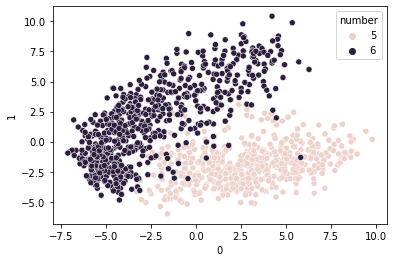

In [89]:
dimension1 = 0    # should be an integer indicating which PCA component to pick
dimension2 = 1    # should be an integer indicating which PCA component to pick

df_two_dimensional = df_projection[[dimension1, dimension2, "number"]]

sns.scatterplot(df_two_dimensional, x = dimension1, y = dimension2, hue = "number")

# Your code here

In [97]:
run_measure_time(prediction_knn, data=df)

Max train score 100.0 % for k = [1]
Max test score 98.51116625310173 % for k = [1]
--- 1.037280559539795 seconds ---


In [98]:
run_measure_time(prediction_knn, data=df_projection[[dimension1, dimension2, "number"]])

Max train score 100.0 % for k = [1]
Max test score 97.27047146401985 % for k = [12]
--- 0.8021953105926514 seconds ---


In [96]:
prediction_knn(df_projection[[dimension1, dimension2, "number"]])

Max train score 100.0 % for k = [1]
Max test score 97.27047146401985 % for k = [12]
